# Create a passive membrane model...
...and try on for 3 types of input currents:
- Step Current
- Pulse Current
- Random Current

To solve, I'll create a function which will handle an arbitrary current and in this case just calculate the voltage

The simplified version of the passive membrane circuit model is:

tau * dV/dt = - (V - V_rest) + R*I

Where I am using the Forward Euler's Method in order to generate a discrete, recurrent representation. This model does not account for action potentials, refraction, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def passive_membrane_model(I, dt, total_time, V_rest, R, tau):
    # Calculate the number of timesteps
    timesteps = int(total_time / dt)
    
    # Initialize the membrane potential array
    V = np.empty(timesteps)
    
    # Set the initial condition
    V[0] = V_rest
    
    # Time evolution
    for t in range(timesteps - 1):
        dV = (- (V[t] - V_rest) + R * I[t]) / tau
        V[t + 1] = V[t] + dV * dt
    return V

In [3]:
# Parameters
dt = 0.01  # time step size
total_time = 100.0  # total time of the simulation
V_rest = -65  # resting membrane potential in mV
R = 1  # membrane resistance
tau = 10  # membrane time constant

# Define currents
cycle = np.concatenate((np.zeros(999), np.ones(1)))

pulse = np.tile(cycle, (int(total_time / dt / len(cycle))))

step = np.concatenate((np.zeros(int(10 / dt)), np.ones(int((total_time - 10) / dt))))

random = np.random.binomial(n = 1, p = 0.01, size = int(total_time/dt))

In [4]:
# Run the model
I = step
V = passive_membrane_model(I, dt, total_time, V_rest, R, tau)

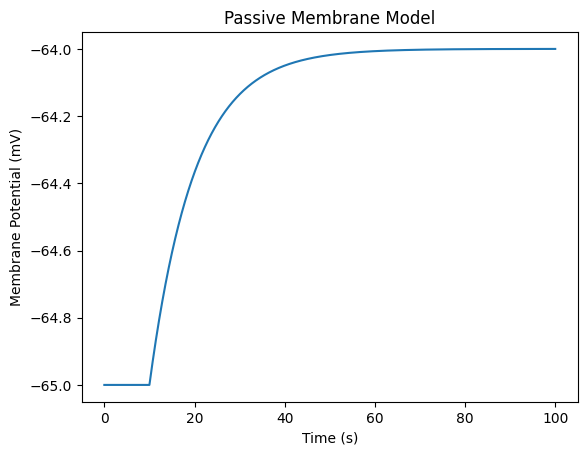

In [5]:
# Plot the results
time = np.arange(0, total_time, dt)
plt.figure()
plt.plot(time, V)
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Passive Membrane Model')
plt.show()